In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s_arousal_deapacc = torch.load('/home/sjf/eegall/results/scere/Arousal-norm-lr5e-05DEAP10_38_500_scebaseseed74_acc.pt')
s_arousal_facedacc = torch.load('/home/sjf/eegall/results/scere/Arousal-norm-lr5e-05FACED10_11_500_scebaseseed74_acc.pt')
s_valence_deapacc = torch.load('/home/sjf/eegall/results/scere/Valence-norm-lr5e-05DEAP10_38_500_scebaseseed74_acc.pt')
s_valence_facedacc = torch.load('/home/sjf/eegall/results/scere/Valence-norm-lr5e-05FACED10_11_500_scebaseseed74_acc.pt')

In [3]:
# Cross entropy
c_arousal_deapacc = torch.load('/home/sjf/eegall/results/cere/Arousal-norm-lr5e-05DEAP10_38_500_cebaseseed74_acc.pt')
c_arousal_facedacc = torch.load('/home/sjf/eegall/results/cere/Arousal-norm-lr5e-05FACED10_11_500_cebaseseed74_acc.pt')
c_valence_deapacc = torch.load('/home/sjf/eegall/results/cere/Valence-norm-lr5e-05DEAP10_38_500_cebaseseed74_acc.pt')
c_valence_facedacc = torch.load('/home/sjf/eegall/results/cere/Valence-norm-lr5e-05FACED10_11_500_cebaseseed74_acc.pt')

In [4]:
s_arousal_deapacc_array = np.mean(s_arousal_deapacc,axis=0)
s_arousal_facedacc_array = np.mean(s_arousal_facedacc,axis=0)
s_valence_deapacc_array = np.mean(s_valence_deapacc,axis=0)
s_valence_facedacc_array = np.mean(s_valence_facedacc,axis=0)

In [5]:
c_arousal_deapacc_array = np.mean(c_arousal_deapacc,axis=0)
c_arousal_facedacc_array = np.mean(c_arousal_facedacc,axis=0)
c_valence_deapacc_array = np.mean(c_valence_deapacc,axis=0)
c_valence_facedacc_array = np.mean(c_valence_facedacc,axis=0)

In [6]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

In [7]:
s_arousal_deapacc_array.shape

(500,)

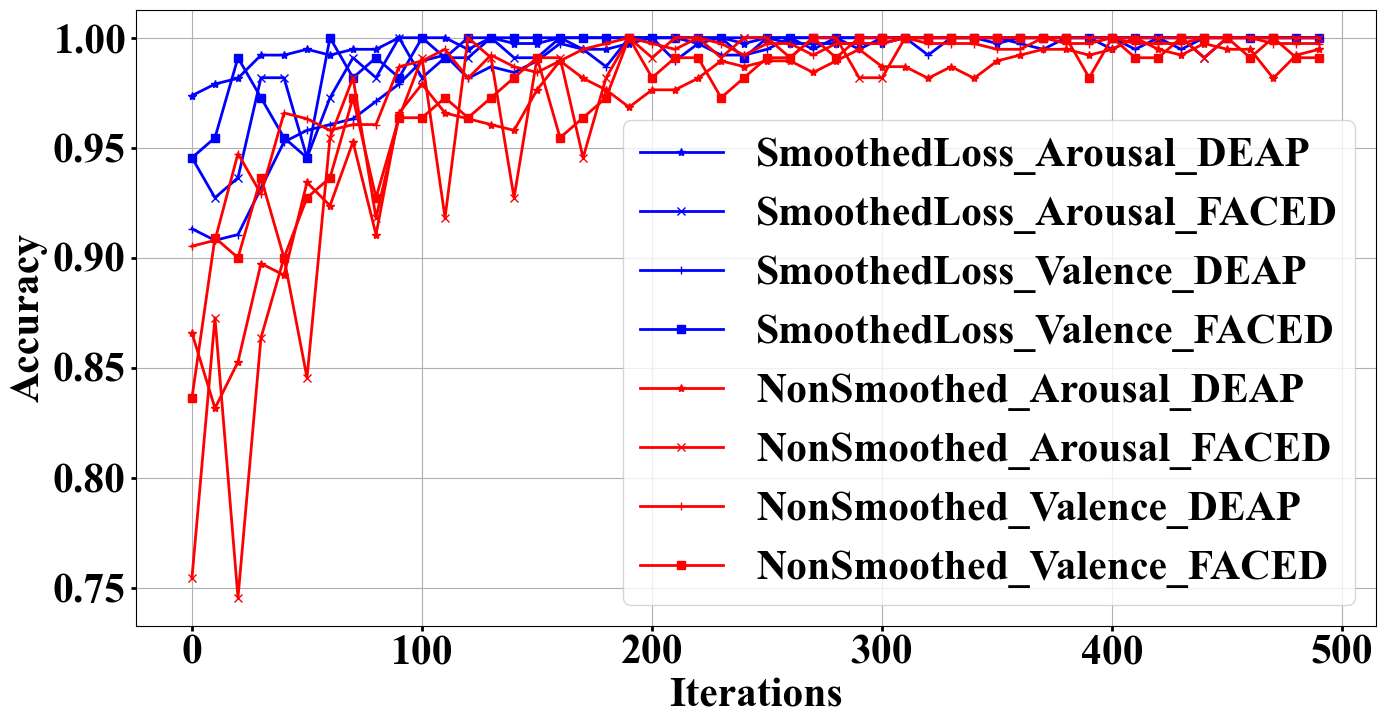

In [10]:
# 创建一个x轴的数组，表示训练的迭代次数或时间步数
# arousal_deapacc_array = np.mean(arousal_deapacc,axis=0)
# arousal_facedacc_array = np.mean(arousal_facedacc,axis=0)
# valence_deapacc_array = np.mean(valence_deapacc,axis=0)
# valence_facedacc_array = np.mean(valence_facedacc,axis=0)
window_size = 1
smoothed_accuracy1 = moving_average(s_arousal_deapacc_array, window_size)[::10]
smoothed_accuracy2 = moving_average(s_arousal_facedacc_array, window_size)[::10]
smoothed_accuracy3 = moving_average(s_valence_deapacc_array, window_size)[::10]
smoothed_accuracy4 = moving_average(s_valence_facedacc_array, window_size)[::10]
smoothed_accuracy5 = moving_average(c_arousal_deapacc_array, window_size)[::10]
smoothed_accuracy6 = moving_average(c_arousal_facedacc_array, window_size)[::10]
smoothed_accuracy7 = moving_average(c_valence_deapacc_array, window_size)[::10]
smoothed_accuracy8 = moving_average(c_valence_facedacc_array, window_size)[::10]
# smoothed_accuracy5 = moving_average(theta_accuracy_array, window_size)
# smoothed_accuracy6 = moving_average(gamma_accuracy_array, window_size)
iterations = range(len(smoothed_accuracy1))
# 绘制多组数据的折线图
plt.figure(figsize=(16, 8))
plt.rcParams['font.family']='Times New Roman'
# plt.plot(iterations, deap_accuracy_array, label='Data 1')
plt.plot(iterations, smoothed_accuracy1, label='SmoothedLoss_Arousal_DEAP', linewidth=2, color='b', linestyle='-', marker='*')
plt.plot(iterations, smoothed_accuracy2, label='SmoothedLoss_Arousal_FACED', linewidth=2, color='b', linestyle='-', marker='x')
plt.plot(iterations, smoothed_accuracy3, label='SmoothedLoss_Valence_DEAP', linewidth=2, color='b', linestyle='-', marker='+')
plt.plot(iterations, smoothed_accuracy4, label='SmoothedLoss_Valence_FACED', linewidth=2, color='b', linestyle='-', marker='s')
plt.plot(iterations, smoothed_accuracy5, label='NonSmoothed_Arousal_DEAP', linewidth=2, color='r', linestyle='-', marker='*')
plt.plot(iterations, smoothed_accuracy6, label='NonSmoothed_Arousal_FACED', linewidth=2, color='r', linestyle='-', marker='x')
plt.plot(iterations, smoothed_accuracy7, label='NonSmoothed_Valence_DEAP', linewidth=2, color='r', linestyle='-', marker='+')
plt.plot(iterations, smoothed_accuracy8, label='NonSmoothed_Valence_FACED', linewidth=2, color='r', linestyle='-', marker='s')
# plt.title('Accuracy Over Iterations for DEAP and FACED Datasets Using Different Loss Function', fontsize=30, fontweight='bold')
# plt.xticks(np.arange(0, 500, 100))
plt.xticks([0,10,20,30,40,50],['0','100','200','300','400','500'],fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', labelsize=30, width=2)  # x 轴设置
plt.tick_params(axis='y', labelsize=30, width=2)  # y 轴设置
plt.xlabel('Iterations',fontweight='bold',fontsize=30)
plt.ylabel('Accuracy',fontweight='bold',fontsize=30)

# 显示图例
plt.legend(prop={'size':30,'weight': 'bold'})

# 显示网格线
plt.grid(True)
plt.savefig('/home/sjf/eegall/dataex/differentloss.jpg',dpi=1000)
# 显示图形
plt.show()